In [1]:
import sys
from helpers.graph import *
from helpers.geometry import *;
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload

Get the raw data
- first line is the graph boundary data
- last line is the source and dest point
- others are obstacles

In this step, need to communicate with the countours extraction step which will provide the boundary and obstacle points

In [2]:
# get data from file
def get_raw_data(file):
    file_handler = open(file,"r")
    raw_data = file_handler.read()
    raw_data = raw_data.split("\n")
    assert len(raw_data)>2, "Incorrect format of the input file"
    return raw_data

In [3]:
# Another way to get the data.
file_line_handler = open("input_file", "r")
line_data = file_line_handler.readlines()
data = []
for line in line_data:
    data.append(line.strip('\n'))
print(data)

['(0, 0), (300, 0), (300, 200), (0, 200)', '(33, 40), (67, 55), (75, 109), (128, 97), (84, 149), (44, 94)', '(189, 102), (250, 165), (158, 132)', '(180, 23), (274, 46), (225, 97), (212, 61), (148, 83)', '(100, 90), (290, 60)']


In [4]:
raw_data = get_raw_data("input_file")

Function: `def parse_input_line(line)`

Change the line format to array:

for Example:  `[[0, 0], [300, 0], [300, 200], [0, 200]]`

In [5]:
def parse_input_line(line):
    temp2 = [];
    line = [i.strip() for i in line.split(",")];
    vertex = [];
    for index,i in enumerate(line):
        if(i[0] == "("):
            i = i[1:];
        if(i[len(i)-1] == ")"):
            i= i[:-1];
        vertex.append(int(i));
        if(index%2 != 0):
            temp2.append(vertex);
            vertex = [];
    return temp2;

Extract vertices and store them in boundary, obstacle, source, dest list

In [6]:
def extract_vertices(raw_data):
    # Extract boundary----------------------------------------------
    temp = parse_input_line(raw_data[0])
    boundary = [point(i[0], i[1]) for i in temp]

    # Extract source and dest
    temp = parse_input_line(raw_data[-1])
    source = point(temp[0][0], temp[0][1])
    dest = point(temp[1][0], temp[1][1])

    # Extract obstacles
    obstacles = []
    for i in raw_data[1:-1]:
        obstacles.append(parse_input_line(i) )
    return boundary, obstacles, source, dest

In [7]:
boundary, obstacles, source, dest = extract_vertices(raw_data)

In [8]:
print(obstacles)

[[[33, 40], [67, 55], [75, 109], [128, 97], [84, 149], [44, 94]], [[189, 102], [250, 165], [158, 132]], [[180, 23], [274, 46], [225, 97], [212, 61], [148, 83]]]


In [9]:
# Draw the obstacles and point the source and the destination----------------------------------------------
def draw_problem(boundary, obstacles, source, dest):
    bnd_x = [i.x for i in boundary]
    # add the x-value of the start point
    bnd_x.append(boundary[0].x)
    bnd_y = [i.y for i in boundary]
    # add the y-value of the start point
    bnd_y.append(boundary[0].y)
    poly_x = []
    poly_y = []

    # Draw the boundary
    plt.plot(bnd_x, bnd_y)

    for index, i in enumerate(obstacles):
        poly_x.append([p[0] for p in i])
        poly_y.append([p[1] for p in i])

        plt.fill( poly_x[index], poly_y[index], color="#512DA8")

    plt.plot(source.x, source.y, marker="o")
    plt.plot(dest.x, dest.y, marker="o")
    plt.annotate('Source', xy=(source.x, source.y), xytext=(source.x+5, source.y-6) )
    plt.annotate('Destination', xy=(dest.x, dest.y), xytext=(dest.x-4, dest.y-10) )

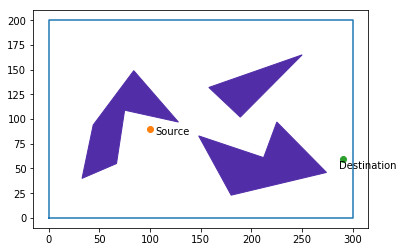

In [10]:
draw_problem(boundary, obstacles, source, dest)

In [11]:
#sort the obstacle points by x-values
# sorted_vertices = []
# for index,i in enumerate(obstacles):
#     # differntiate the obstacles by the index appended in the end 
#     # now each obstacle point has 3 value [x, y, index]
#     for j in i:
#         j.append(index)
#         sorted_vertices.append(j)
# sorted_vertices.sort(key=lambda x: x[0])
# print(sorted_vertices)

In [12]:
# new_sorted_vertices array: store the sorted(by x-value) point object of the obstacle points
# new_sorted_vertices = [];
# for i in sorted_vertices:
#     temp = point(i[0], i[1], i[2])
#     new_sorted_vertices.append(temp)

In [13]:
new_sorted_vertices = []
for index, pnts in enumerate(obstacles):
    for pnt in pnts:
        new_sorted_vertices.append(point(pnt[0], pnt[1], index))
new_sorted_vertices.sort(key = lambda pnt: pnt.x)

for pnt in new_sorted_vertices:
    print(pnt)

x = 33, y = 40, obs = 0 and test:-1
x = 44, y = 94, obs = 0 and test:-1
x = 67, y = 55, obs = 0 and test:-1
x = 75, y = 109, obs = 0 and test:-1
x = 84, y = 149, obs = 0 and test:-1
x = 128, y = 97, obs = 0 and test:-1
x = 148, y = 83, obs = 2 and test:-1
x = 158, y = 132, obs = 1 and test:-1
x = 180, y = 23, obs = 2 and test:-1
x = 189, y = 102, obs = 1 and test:-1
x = 212, y = 61, obs = 2 and test:-1
x = 225, y = 97, obs = 2 and test:-1
x = 250, y = 165, obs = 1 and test:-1
x = 274, y = 46, obs = 2 and test:-1


In [14]:
# obstacle array, each element is a obstacle composed by the points[x, y, index]
new_obstacles = []
for index, i in enumerate(obstacles):
    temp_obs = []
    for j in i:
        temp = point(j[0], j[1], index)
        temp_obs.append(temp)
    new_obstacles.append(temp_obs)
    
for ost in new_obstacles:
    for pnt in ost:
        print(pnt)

x = 33, y = 40, obs = 0 and test:-1
x = 67, y = 55, obs = 0 and test:-1
x = 75, y = 109, obs = 0 and test:-1
x = 128, y = 97, obs = 0 and test:-1
x = 84, y = 149, obs = 0 and test:-1
x = 44, y = 94, obs = 0 and test:-1
x = 189, y = 102, obs = 1 and test:-1
x = 250, y = 165, obs = 1 and test:-1
x = 158, y = 132, obs = 1 and test:-1
x = 180, y = 23, obs = 2 and test:-1
x = 274, y = 46, obs = 2 and test:-1
x = 225, y = 97, obs = 2 and test:-1
x = 212, y = 61, obs = 2 and test:-1
x = 148, y = 83, obs = 2 and test:-1


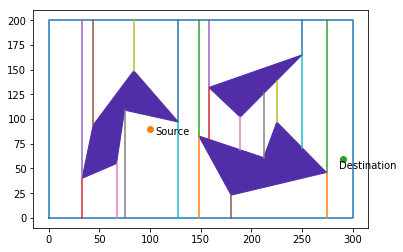

In [15]:
draw_problem(boundary, obstacles, source, dest)
#-----------------------------------------------------------
# Find vertical lines
open_line_segments = [];

y_limit_lower = boundary[0].y;
y_limit_upper = boundary[2].y;

for pt in new_sorted_vertices:
    curr_line_segment = [ point(pt.x, y_limit_lower), point(pt.x, y_limit_upper) ]; 
    lower_obs_pt = curr_line_segment[0];
    upper_obs_pt = curr_line_segment[1];
    upper_gone = False;
    lower_gone = False;
    break_now = False;

	# Find intersection points with the vertical proposed lines. the intersection function returns false if segments are same, so no need to worry about same segment checking
    for index,obs in enumerate(new_obstacles):
        # Add the first point again for the last line segment of a polygon.

        obs.append( obs[0] );

        
        for vertex_index in range(len(obs)-1 ):
            # compare curr_line and segment from obstacle
            # check whether the two section is intersected or colinear
            # since the curr_line is the segment [point(pt.x, y_limit_lower), point(pt.x, y_limit_upper)], so that if the points are colinear, it must intersect
            # return the intersection point if the line intersect, and -1 if not.
            res = segment_intersection( curr_line_segment[0], curr_line_segment[1], obs[vertex_index],  obs[vertex_index+1]);
            if (res!=-1):
                if ( index == pt.obstacle ):
                    if pt.equals( res ) == False:
                        if ( res.y > pt.y ):
                            upper_gone = True;
                        elif ( res.y < pt.y ):
                            lower_gone = True;	
                else:	
                    if pt.equals( res ) == False:
                        if ( upper_gone is False ):
                            if ( (res.y > pt.y) and res.y < (upper_obs_pt.y) ):
                                upper_obs_pt = res;
                        if ( lower_gone is False ):
                            if ( (res.y < pt.y) and (res.y > lower_obs_pt.y) ):
                                lower_obs_pt = res;

            if( upper_gone is True and lower_gone is True ):
                break_now = True;

        #No need to check for current point anymore...completely blocked
        if(break_now is True):
            break;		

    # Draw the vertical cell lines
    if(lower_gone is False):
        plt.plot( [lower_obs_pt.x, pt.x],  [lower_obs_pt.y, pt.y] );

    if(upper_gone is False):
        plt.plot( [pt.x, upper_obs_pt.x],  [pt.y, upper_obs_pt.y] );

    # Add to the global segment list
    if (lower_gone and upper_gone):
        open_line_segments.append([None, None]);
    elif (lower_gone):
        open_line_segments.append([None, upper_obs_pt]);
    elif (upper_gone):
        open_line_segments.append([lower_obs_pt, None]);
    else:
        open_line_segments.append([lower_obs_pt, upper_obs_pt]);

In [16]:
print(len(open_line_segments))

14


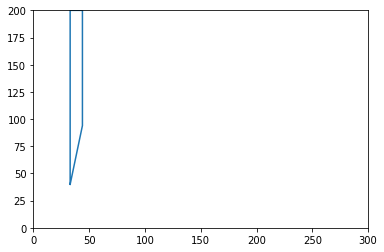

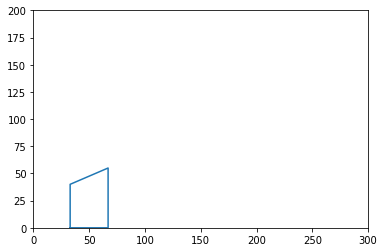

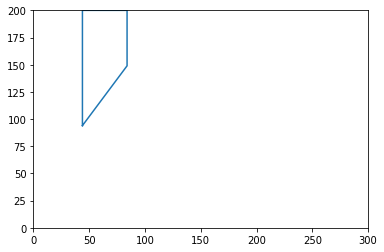

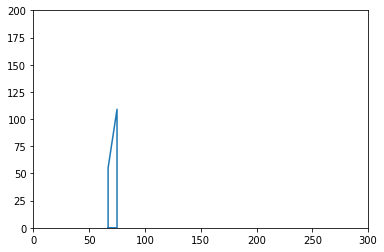

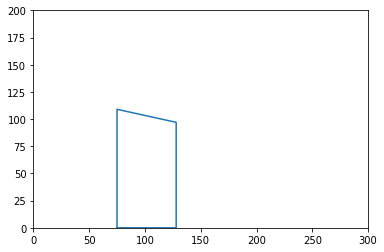

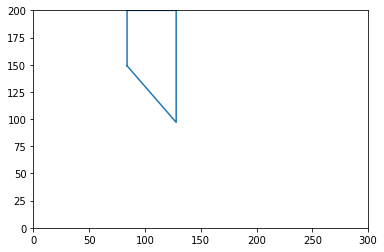

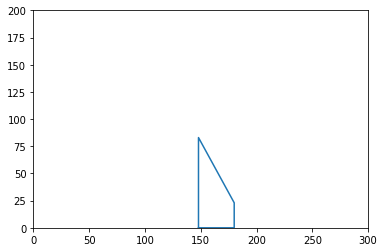

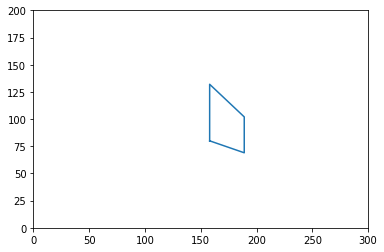

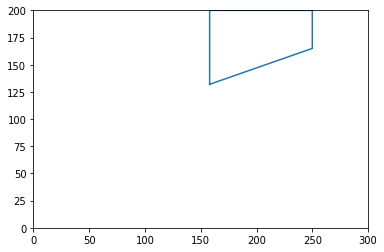

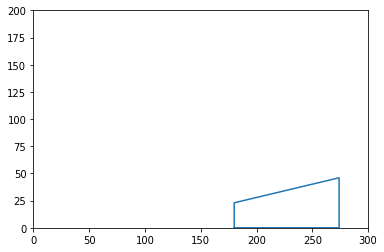

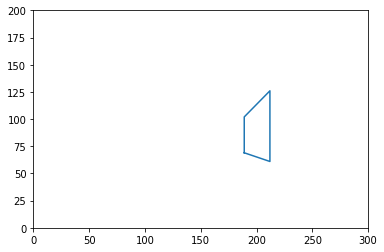

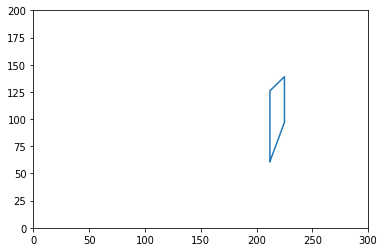

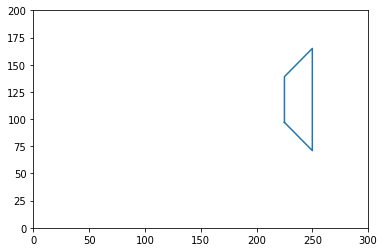

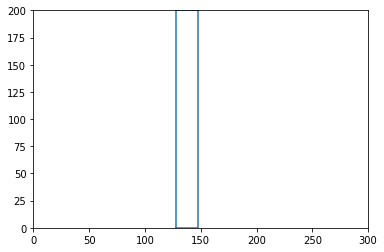

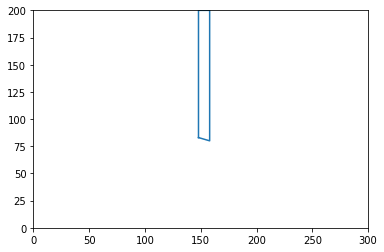

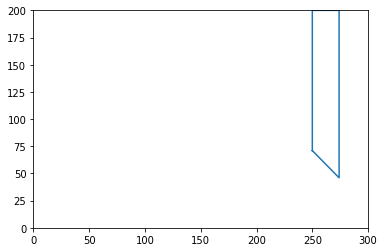

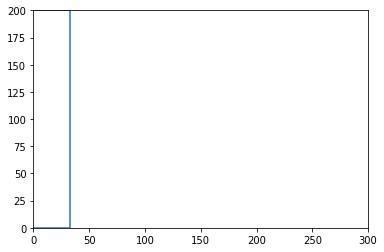

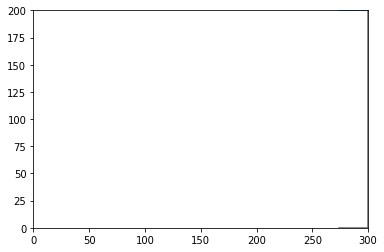

In [17]:

#------------------------------------------------------
# Find Polygon cells naiively. Will improve next. 
cells = [];

# open_line_segments and new_sorted_vertices has the same order of points, based on the x_value

for index1 in range(len(open_line_segments) ):
    curr_segment = open_line_segments[index1];
    curr_vertex = new_sorted_vertices[index1];
    break_now = False;
    done = [False, False, True];

    # if the lower pt is the vertice
    if( curr_segment[0] is None ):
        done[0] = True; 
    # if the upper vertice is the vertice
    if( curr_segment[1] is None ):
        done[1] = True;	
    # if both lower and upper pts are the vertice, which also means there is no vertical line through this line
    if( curr_segment[0] is None and curr_segment[1] is None):
        done[2] = False;	

    # index2 the following sorted vertices
    for index2 in range(index1+1,  len(open_line_segments)):
        next_segment = open_line_segments[index2];
        next_vertex = new_sorted_vertices[index2];			

        double_index1 = -2;
        double_index2 = -2;
        lines_to_check = [];
        trapezoids = [];
        double_check = False;

        # both end points of the following segment aren't the vertice.
        if (next_segment[0] is not None and next_segment[1] is not None ):
            double_check = True;

        # if the lower pt isn't the vertice
        if( done[0] is False ):
            if( double_check ):
                double_index1 = len(lines_to_check);
                lines_to_check.append( [centroid([curr_segment[0], curr_vertex]), centroid([next_segment[0], next_vertex]), 0]);
                lines_to_check.append( [centroid([curr_segment[0], curr_vertex]), centroid([next_segment[1], next_vertex]), 0]);
                trapezoids.append([ curr_segment[0], next_segment[0], next_vertex, curr_vertex ]);
                trapezoids.append([ curr_segment[0], next_vertex, next_segment[1], curr_vertex ]);
            elif ( next_segment[0] is not None ):
                lines_to_check.append( [centroid([curr_segment[0], curr_vertex]), centroid([next_segment[0], next_vertex]), 0]);
                trapezoids.append([ curr_segment[0], next_segment[0], next_vertex, curr_vertex ]);
            elif( next_segment[1] is not None ):
                lines_to_check.append( [centroid([curr_segment[0], curr_vertex]), centroid([next_segment[1], next_vertex]), 0]);
                trapezoids.append([ curr_segment[0], next_vertex, next_segment[1], curr_vertex ]);
            else:
                lines_to_check.append( [centroid([curr_segment[0], curr_vertex]), next_vertex, 0]);
                trapezoids.append([ curr_segment[0], next_vertex, curr_vertex ]);

        if( done[1] is False ):
            if( double_check ):
                double_index2 = len(lines_to_check);
                lines_to_check.append( [centroid([curr_segment[1], curr_vertex]), centroid([next_segment[0], next_vertex]), 1]);
                lines_to_check.append( [centroid([curr_segment[1], curr_vertex]), centroid([next_segment[1], next_vertex]), 1]);
                trapezoids.append([ curr_vertex, next_segment[0], next_vertex , point(curr_segment[1].x, curr_segment[1].y,curr_segment[1].obstacle, 34)]);
                trapezoids.append([ curr_vertex, next_vertex, next_segment[1], curr_segment[1] ]);
            elif ( next_segment[1] is not None ):
                lines_to_check.append( [centroid([curr_segment[1], curr_vertex]), centroid([next_segment[1], next_vertex]), 1]);
                trapezoids.append([ curr_vertex, next_vertex, next_segment[1], curr_segment[1] ]);
            elif( next_segment[0] is not None ):
                lines_to_check.append( [centroid([curr_segment[1], curr_vertex]), centroid([next_segment[0], next_vertex]), 1]);
                trapezoids.append([ curr_vertex, next_segment[0], next_vertex , curr_segment[1] ]);
            else:
                lines_to_check.append( [centroid([curr_segment[1], curr_vertex]), next_vertex, 1]);
                trapezoids.append([ curr_vertex, next_vertex, curr_segment[1] ]);

        if( done[2] is False ):
            if(double_check):
                double_index = len(lines_to_check);
                lines_to_check.append( [curr_vertex, centroid([next_segment[0], next_vertex]), 2]);
                trapezoids.append([ curr_vertex,next_segment[0], next_vertex ]);
                lines_to_check.append( [curr_vertex, centroid([next_segment[1], next_vertex]), 2]);
                trapezoids.append([ curr_vertex, next_vertex, next_segment[1] ]);
            elif ( next_segment[0] is not None ):
                lines_to_check.append( [curr_vertex, centroid([next_segment[0], next_vertex]), 2]);
                trapezoids.append([ curr_vertex,next_segment[0], next_vertex ]);
            elif( next_segment[1] is not None ):
                lines_to_check.append( [curr_vertex, centroid([next_segment[1], next_vertex]), 2]);
                trapezoids.append([ curr_vertex, next_vertex, next_segment[1] ]);
            # Will this ever occur though??
            else:
                lines_to_check.append( [curr_vertex, next_vertex, 2]);
                trapezoids.append([curr_vertex, next_vertex]);

        temp_to_remove = [];
        for index5,q in enumerate(lines_to_check): 
            ok = [True, True, True];
            for index3,obs in enumerate(new_obstacles):
                # Add the last line to make closed polygon
                obs.append( obs[0] );
                for index4 in range(len(obs)-1):
                    if (segment_intersection( q[0], q[1],  obs[index4],  obs[index4+1]) != -1):
                        ok[q[2]] = False;
                        if(index5 not in temp_to_remove):
                            temp_to_remove.append(index5);


            if (  ok[q[2]] is True ):
                done[q[2]] = True;

        for i in range(len(lines_to_check)):
            if i not in temp_to_remove:
                cells.append(trapezoids[i]);

        if( done[0] == True and done[1] == True and done[2] == True ):
            break;

to_draw =[];
for i in cells:
	i.append(i[0]);
	to_draw.append(i);


# #-------------------------------------------------------
# # Merge overlapping Polygons
quad_cells = [i for i in cells if len(i)>3];
tri_cells = [i for i in cells if len(i)==3];
others = [i for i in cells if len(i)<3];
quads_to_remove = [];
quads_to_add = [];

quads_to_remove = [];
quads_to_add = [];
for index_cell in range(len(quad_cells)):
    for index_cell2,cell in enumerate(quad_cells):
        if(index_cell != index_cell2):
            if(quad_cells[index_cell][0].x == cell[0].x and quad_cells[index_cell][1].x == cell[1].x):
                    temp1 = list(quad_cells[index_cell]);
                    temp1.append(temp1[0]);
                    temp2 = list(cell);
                    temp2.append(temp2[0]);
                    area1 = polygon_area(temp1,4); area2 = polygon_area(temp2,4);
                    new_quad=[];

                    new_quad.append( point(temp1[0].x, min(temp1[0].y, temp2[0].y)) );
                    new_quad.append( point(temp1[1].x, min(temp1[1].y, temp2[1].y)) );
                    new_quad.append( point(temp1[1].x, max(temp1[2].y, temp2[2].y)) );
                    new_quad.append( point(temp1[0].x, max(temp1[3].y, temp2[3].y)) );
                    new_quad.append( point(temp1[0].x, min(temp1[0].y, temp2[0].y)) );
                    area3 = polygon_area(new_quad, 4);
                    if( area1 + area2 >= area3):
                        #merge
                        quads_to_remove.append(index_cell);
                        quads_to_remove.append(index_cell2);

                        quads_to_add.append(new_quad);

quads_to_remove = list(set(quads_to_remove));
for index in sorted(quads_to_remove, reverse=True):
    del quad_cells[index];

for i in quads_to_add:
    quad_cells.append(i);

# # Remove duplicates
to_remove = [];
for index1 in range(len(quad_cells)):
    for index2 in range(index1+1, len(quad_cells)):
        duplicate = True;
        for k,m in zip(quad_cells[index1], quad_cells[index2]):
            if k.equals(m) is False:
                duplicate = False;
                break;
        if(duplicate is True):
            if index2 not in to_remove:
                to_remove.append(index2);		

for index in sorted(to_remove, reverse=True):
    del quad_cells[index];

# # One more pass to remove extra quads generated because of cross - segments
quads_to_remove = [];
for index1 in range(len(quad_cells)):
    for index2 in range(len(quad_cells)):
        if(index1 != index2 and quad_cells[index1][0].x == quad_cells[index2][0].x and quad_cells[index1][1].x == quad_cells[index2][1].x):

            if( (quad_cells[index1][0].y<= quad_cells[index2][0].y) and  (quad_cells[index1][1].y<= quad_cells[index2][1].y)
                and (quad_cells[index1][2].y>= quad_cells[index2][2].y) and (quad_cells[index1][3].y >= quad_cells[index2][3].y)):
                quads_to_remove.append(index2);


quads_to_remove = list(set(quads_to_remove) );
for index in sorted(quads_to_remove, reverse=True):
    del quad_cells[index];


#------------------------------------------------------
# Add boundary lines
if( boundary[0].x != new_sorted_vertices[0].x):
    quad_cells.append([boundary[0], point(new_sorted_vertices[0].x, y_limit_lower), point(new_sorted_vertices[0].x, y_limit_upper), boundary[3]]);
if( boundary[1].x != new_sorted_vertices[len(new_sorted_vertices)-1].x):
    quad_cells.append([point(new_sorted_vertices[len(new_sorted_vertices)-1].x ,y_limit_lower), boundary[1], boundary[2], point(new_sorted_vertices[len(new_sorted_vertices)-1].x, y_limit_upper) ]);

# #-------------------------------------------------------
# # Plot final cells
to_draw = quad_cells+tri_cells+others;
for index, i in enumerate(to_draw):
    x = [j.x for j in i];
    y = [j.y for j in i];
    plt.figure(index)
    plt.xlim(0,300)
    plt.ylim(0,200)
    plt.plot(x, y);


Path found.


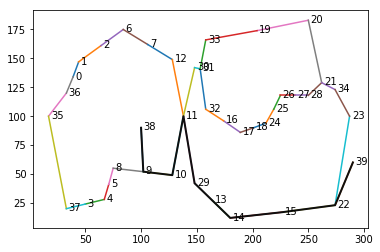

In [18]:
#----------------------------------------------------------------------
# Get the graph
graph_vertices = [];
graph_edges = [];

for index1 in range(len(quad_cells)):
    same_boundary = [];
    for index2 in range(len(quad_cells)):
        if(index1 != index2):
            if( (quad_cells[index1][1].x == quad_cells[index2][0].x ) and ((quad_cells[index1][2].y in [quad_cells[index2][0].y, quad_cells[index2][3].y]) or (quad_cells[index1][1].y in [quad_cells[index2][0].y, quad_cells[index2][3].y]) ) ):
                same_boundary.append(index2);

    temp = quad_cells[index1][0:4];
    centroid_vertex = centroid(temp);
    place = centroid_vertex.find_point(graph_vertices)
    if( place == -1):
        graph_vertices.append(centroid_vertex);

    if(len(same_boundary)==1):
        temp_edge_middle = centroid([quad_cells[index1][1], quad_cells[index1][2]]);
        graph_vertices.append(temp_edge_middle);
        n = len(graph_vertices)-1;
        if(place != -1):
            graph_edges.append([place, n]);
        else:
            graph_edges.append([n-1, n]);
        temp = quad_cells[same_boundary[0]][0:4];
        curr_centroid_vertex = centroid(temp);
        place2 = curr_centroid_vertex.find_point(graph_vertices);
        if( place2 == -1 ):
            graph_vertices.append(curr_centroid_vertex);
            graph_edges.append([n, n+1]);
        else:
            graph_edges.append([n, place2]);

    elif(len(same_boundary)>1):
        n = len(graph_vertices)-1;
        if(place != -1):
            use = place;
        else:
            use = n;	
        for index, i in enumerate(same_boundary):
            temp = quad_cells[i][0:4];
            curr_centroid_vertex = centroid(temp);
            temp_edge_middle = centroid([quad_cells[i][0], quad_cells[i][3]]);
            graph_vertices.append(temp_edge_middle);
            pl1 =len(graph_vertices)-1;
            graph_edges.append([use, pl1]);
            hmmm= curr_centroid_vertex.find_point(graph_vertices);
            if (hmmm == -1):
                graph_vertices.append(curr_centroid_vertex);
                pl2 =len(graph_vertices)-1;
            else:
                pl2 = hmmm;	
            graph_edges.append([pl1, pl2]);		


# Add source and dest to graph
# Find the smallest distance vertex on graph and see if its clear to traverse
# Source------------------------------
min_ind = -1; min = 9999999;
for index, i in enumerate(graph_vertices):
    if( check_obstruction(new_obstacles, [source, i]) is True ):
        dist = find_dist(i, source);
        if( dist < min):
            min = dist;
            min_ind = index;

graph_vertices.append(source);
m = len(graph_vertices)-1;
graph_edges.append([min_ind, m]);	

# Destination------------------------------------
min_ind = -1; min = 9999999;
for index, i in enumerate(graph_vertices):
    if( check_obstruction(new_obstacles, [dest, i]) is True ):
        dist = find_dist(i, dest);
        if( dist < min):
            min = dist;
            min_ind = index;

graph_vertices.append(dest);
m = len(graph_vertices)-1;
graph_edges.append([min_ind, m]);

# Convert graph in adjacency list format
graph = [];
for j in range(len(graph_vertices)):
    graph.append([]);
    for i in graph_edges:
        if(i[0]==j):
            graph[j].append(i[1]);
        elif(i[1]==j):
            graph[j].append(i[0]);	

path = bfs(graph, len(graph_vertices)-2, len(graph_vertices)-1);

if(path is None):
    print("No path found. Sorry");
    sys.exit();
else:
    print("Path found.")	;

# Draw everything--------------
for index,i in enumerate(graph_vertices):
    plt.annotate(str(index), xy=(i.x, i.y), xytext=(i.x+2, i.y-2) );
    # plt.plot(i.x,i.y, marker="x");

for i in graph_edges:
    temp_x = [graph_vertices[i[0]].x, graph_vertices[i[1]].x];
    temp_y = [graph_vertices[i[0]].y, graph_vertices[i[1]].y];
    plt.plot(temp_x,temp_y);


# draw path
temp_x = [graph_vertices[i].x for i in path];
temp_y = [graph_vertices[i].y for i in path];
plt.plot(temp_x,temp_y, color="#0F0F0F", linewidth=2);	

In [6]:
obstacle_baisc = [[0,0],[2,0],[1,1],[2,2],[0,2]]
obstacle = [point(x[0], x[1]) for x in obstacle_baisc]

In [7]:
print(obstacle[0].x)

0


In [32]:
point_1 = point(1.5, 0.4)

In [33]:
point_1.inside_polygon([obstacle])

[0, 0]
0
0
[[0, 0], [2, 0], [1, 1], [2, 2], [0, 2]]


True

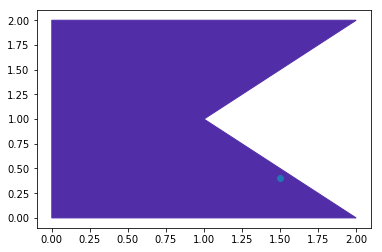

In [34]:
poly_x = []
poly_y = []
poly_x.append([p[0] for p in obstacle_baisc])
poly_y.append([p[1] for p in obstacle_baisc])
plt.plot(point_1.x, point_1.y, marker="o")
plt.fill( poly_x[0], poly_y[0], color="#512DA8")